<a href="https://colab.research.google.com/github/hyungdon/G69D/blob/master/atf4_binding_site_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

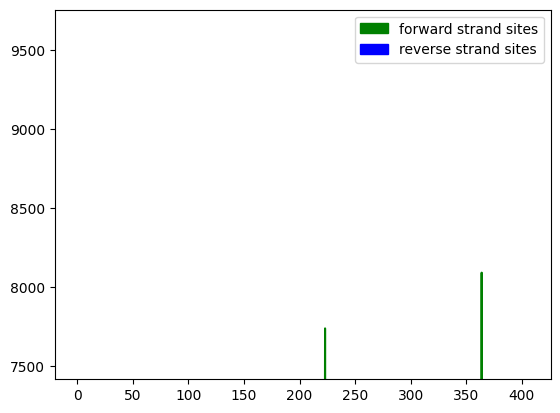

GGCTGATGAA
7737
TTCTGATGCA
8090


In [7]:
!pip install colorama
from termcolor import colored
from colorama import Fore, Style
from matplotlib import pyplot
import matplotlib.patches as mpatches
import re
Thor2p = "taagtttcgaaaattggaagctgagactacatcgagtattattaagttccttccggaaagtggagtgattttcttatcattagatatgatatcaagatgaaattaatcaacatatttcgaaaacataaacaagtataccgtttctttcctttgctcaaacaacaaacaagcttttgtttgagttgtgatacattatttttgtaaaactcactcaccattttttggctgatgaaactgggccatctcgccgagtcagtcagttggaagataatcccgagcacatgttccacagttcgtgactcagagtagcgcggcaaagaagcgtttactcagctggcttatcagtggggaactttgaatacctttctgatgcaacgcagaccaccttgactaataaaaatttccgctttcctataattc"
# This is the 4E-BP intron DNA sequence
## One can replace this with any sequence of choice
def atf4_binding_sites (seq, profile):
    #"find ATF4 binding sites based on position weight matrix"
    width = len(profile['T'])
    bindingscore = []
    for i in range(len(seq)-width):
        score = 0
        for j in range(width):
            letter = seq[i+j]
            score += profile [letter][j]
        bindingscore.append (score)
    return bindingscore

## this is the human pfm for ATF4 (matrix id: MA0833.1)
profile = {'A': [210, 169, 639, 0, 19, 888, 2, 1, 40, 879, 888, 0, 414], 'C': [71, 117, 202, 0, 0, 0, 372, 0, 838, 21, 3, 266, 272], 'G': [442, 409, 127, 7, 1090, 0, 9, 1104, 16, 0, 1, 62, 101], 'T': [170, 213, 3, 981, 11, 25, 470, 4, 113, 3, 4, 714, 78]}
profilerevcomp = {'T': [414, 0, 888, 879, 40, 1, 2, 888, 19, 0, 639, 169, 210], 'G': [272, 266, 3, 21, 838, 0, 372, 0, 0, 0, 202, 117, 71], 'C': [101, 62, 1, 0, 16, 1104, 9, 0, 1090, 7, 127, 409, 442], 'A': [78, 714, 4, 3, 113, 4, 470, 25, 11, 981, 3, 213, 170]}
## generates maximum binding score of transcription factorupperseq = Thor2p.upper ()
max_binding_list = []
for i in range(len(profile['A'])):
    score_list = []
    score_list.append(profile['A'][i])
    score_list.append(profile['C'][i])
    score_list.append(profile['G'][i])
    score_list.append(profile['T'][i])
    max_binding_list.append(max(score_list))
max_score = sum(max_binding_list)
upperseq = Thor2p.upper()
bindingscores = atf4_binding_sites (upperseq, profile)
revcompbindingscores = atf4_binding_sites (upperseq, profilerevcomp)
from matplotlib import pyplot
pyplot.plot (revcompbindingscores)
pyplot.ylim (0.76 * max_score, max_score)
pyplot.plot (bindingscores, "green")
pyplot.ylim (0.76 * max_score, max_score)
green_patch = mpatches.Patch(color='green', label='forward strand sites')
blue_patch = mpatches.Patch(color='blue', label='reverse strand sites')
pyplot.legend(handles=[green_patch, blue_patch])
pyplot.show ()
for i in range (len(bindingscores)):
    if bindingscores[i] > 0.76 * max_score:
        print(upperseq[i:i + 10])
        print(bindingscores[i])


In [10]:
## accesses binding site information
forsites = []
forpairs = []
revsites = []
revpairs = []
def binding_sites (binding, sites, pairs):
    for i in range (len(binding)):
        if binding[i] > 0.76 * max_score:
            number = binding[i]
            sequence = Thor2p[i:i + len(profile['A'])]
            sites.append(sequence)
            percent_max_score = int(number/max_score * 100.0)
            pair = sequence.upper() + ': ' + str(percent_max_score) + " percent of the max binding score"
            pairs.append(str(pair))
    return sites, pairs
binding_sites(bindingscores, forsites, forpairs)
binding_sites(revcompbindingscores, revsites, revpairs)
## color codes sites and displays them in the DNA sequence
def replace_all(text, sites, color):
    for i in range (len(sites)):
        visible_sites = colored(sites[i].upper(), color, attrs=['bold'])
        text = text.replace(sites[i], visible_sites)
    return text
forDNA = replace_all(Thor2p, forsites, 'green')
finalDNA = replace_all(forDNA, revsites, 'blue')
print(finalDNA)
##presents binding scores for both original and revcomp
allsites = forsites + revsites
print('\n' + Fore.RED + str(len(allsites)) + ' binding sites')
print(Fore.BLUE + '\n'.join(revpairs) + Fore.GREEN + '\n'.join(forpairs))

taagtttcgaaaattggaagctgagactacatcgagtattattaagttccttccggaaagtggagtgattttcttatcattagatatgatatcaagatgaaattaatcaacatatttcgaaaacataaacaagtataccgtttctttcctttgctcaaacaacaaacaagcttttgtttgagttgtgatacattatttttgtaaaactcactcaccattttttGGCTGATGAAACTgggccatctcgccgagtcagtcagttggaagataatcccgagcacatgttccacagttcgtgactcagagtagcgcggcaaagaagcgtttactcagctggcttatcagtggggaactttgaatacctTTCTGATGCAACGcagaccaccttgactaataaaaatttccgctttcctataattc

2 binding sites
GGCTGATGAAACT: 79 percent of the max binding score
TTCTGATGCAACG: 82 percent of the max binding score
